In [1]:
from Hive import Hive
from EyerissF import EyerissF as EF
import numpy as np
import Extension
import skimage.io as io
import matplotlib.pyplot as plt

In [2]:
ef = EF()
hive = Hive(ef,mode="manuel")

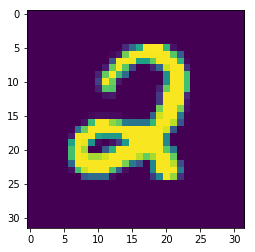

In [3]:
pics = [255-io.imread("Pic/01.png", as_grey=True)]
flts = [np.load("ConvLayerFilter/ConvLayer1Filter"+str(x)+".npy") for x in range(1,7)]

plt.imshow(pics[0])
plt.show()

In [4]:
pics=hive.Compress(pics)
flts=hive.Compress(flts)

In [5]:
hive.input(pics, flts, 1, 6)
hive.Conv2LogicalMapping()
hive.Conv2PhysicalMapping()


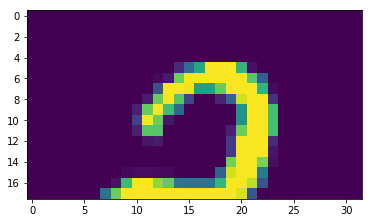

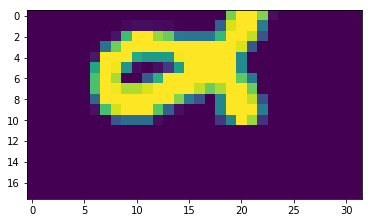

In [6]:

plt.imshow(hive.mapping[0])
plt.show()

plt.imshow(hive.mapping[1])
plt.show()



In [7]:
hive.Conv2d()

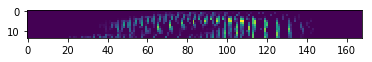

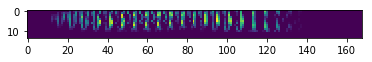

In [8]:
plt.imshow(hive.t[0])
plt.show()

plt.imshow(hive.t[1])
plt.show()

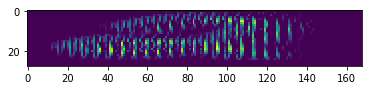

In [9]:
plt.imshow(hive.TempPsum)
plt.show()

In [10]:
hive.Reverse()
pics=hive.Output()

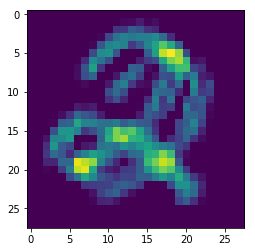

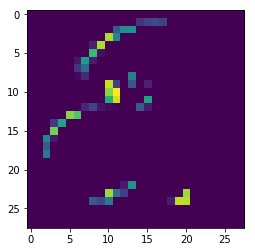

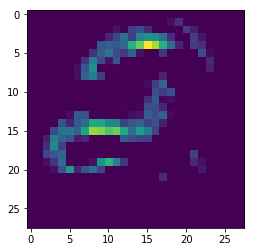

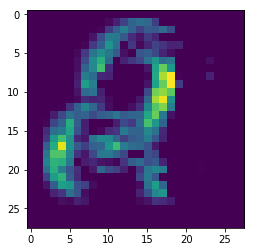

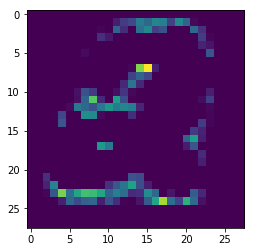

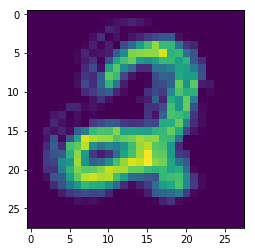

In [11]:

pics2=hive.Decompress(pics)
plt.imshow(pics2[0])
plt.show()

plt.imshow(pics2[1])
plt.show()

plt.imshow(pics2[2])
plt.show()

plt.imshow(pics2[3])
plt.show()

plt.imshow(pics2[4])
plt.show()

plt.imshow(pics2[5])
plt.show()



In [12]:
pics=hive.Pooling(hive.Decompress(pics),255)

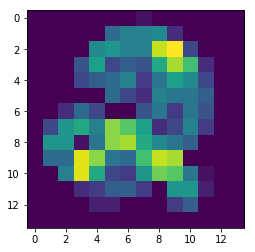

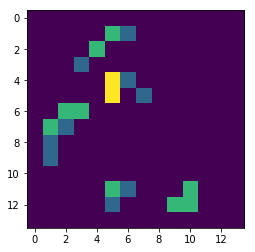

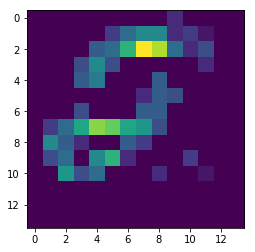

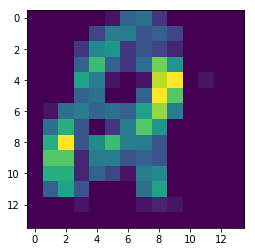

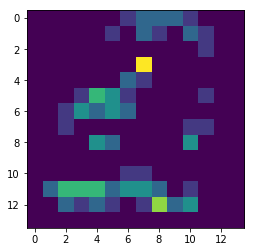

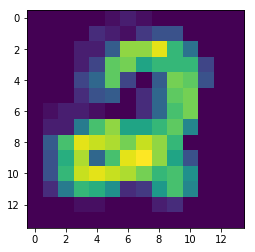

In [13]:
pics2=pics
plt.imshow(pics2[0])
plt.show()

plt.imshow(pics2[1])
plt.show()

plt.imshow(pics2[2])
plt.show()

plt.imshow(pics2[3])
plt.show()

plt.imshow(pics2[4])
plt.show()

plt.imshow(pics2[5])
plt.show()

In [14]:
flts=[np.load("ConvLayerFilter/ConvLayer2Filter"+str(x)+".npy") for x in range(1,17)]
pics=hive.Compress(pics)
flts=hive.Compress(flts)

In [15]:
r=[]
for x in range(16):
    hive.input(pics, list([flts[x]]), 6, 1)
    hive.Conv2LogicalMapping()
    hive.Conv2PhysicalMapping()
    hive.Conv2d()
    hive.Reverse()
    r.append(hive.Output())

pics = [Extension.NumpyAddExtension(hive.Decompress(r[x])) for x in range(16)]

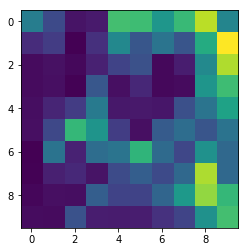

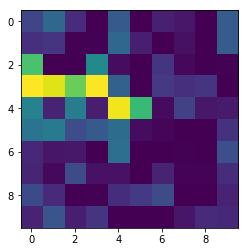

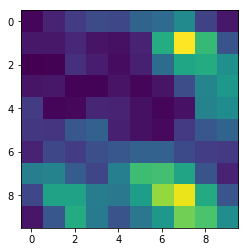

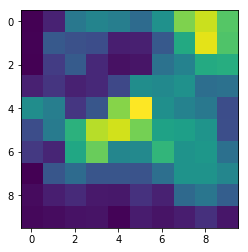

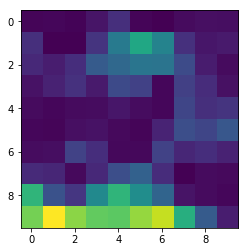

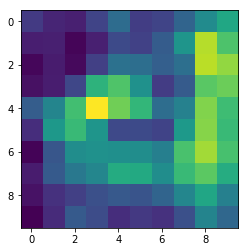

In [16]:
pics2=pics
plt.imshow(pics2[0])
plt.show()

plt.imshow(pics2[1])
plt.show()

plt.imshow(pics2[2])
plt.show()

plt.imshow(pics2[3])
plt.show()

plt.imshow(pics2[4])
plt.show()

plt.imshow(pics2[5])
plt.show()


In [17]:
pics=hive.Pooling(pics,255)

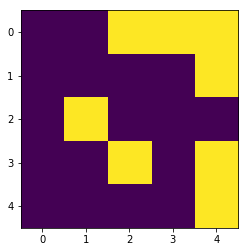

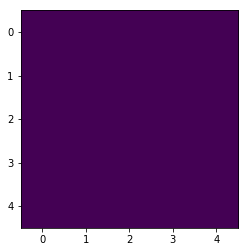

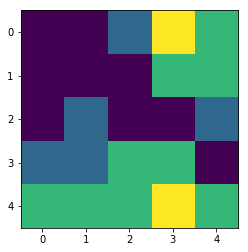

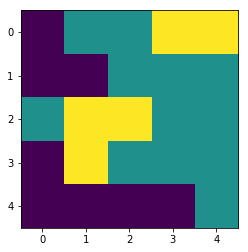

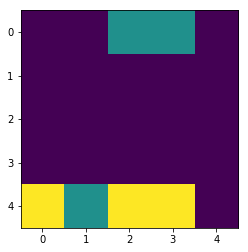

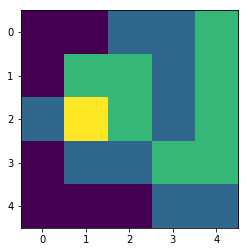

In [18]:
pics2=pics
plt.imshow(pics2[0])
plt.show()

plt.imshow(pics2[1])
plt.show()

plt.imshow(pics2[2])
plt.show()

plt.imshow(pics2[3])
plt.show()

plt.imshow(pics2[4])
plt.show()

plt.imshow(pics2[5])
plt.show()

In [19]:
vector = hive.FullConnect(np.array(pics).flatten(),np.load('FullConnectLayer/FullConnectLayer1.npy'),255)

In [20]:
vector = hive.FullConnect(vector, np.load('FullConnectLayer/FullConnectLayer2.npy'))

In [21]:
vector = hive.FullConnect(vector, np.load('FullConnectLayer/FullConnectLayer3.npy'))

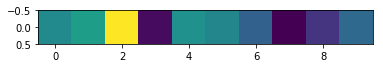

In [22]:
vector=vector.reshape(1,vector.size)
plt.imshow(vector)
plt.show()

In [23]:
print("this number is : ",vector.argmax())

this number is :  2
